<h1>Doğrusal Olmayan Regresyon Modelleri</h1>

<h2>1-K-En Yakın Komşu(K-Nearest Neighbors)</h2>
Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır.
<img src="image/Knn.JPG">

- Komşu sayısını belirle(K)
- Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla.
- Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç.
- sınıflandırma ise en sık sınıf,regresyon ise ortalama değeri tahmin değeri olarak ver.

<h3>Model & Tahmin</h3>

In [38]:
#uyarıları kapatması için
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
#TÜM Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [59]:
#model
knn_model=KNeighborsRegressor().fit(X_train,y_train)
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [60]:
knn_model.n_neighbors

5

In [61]:
#tahmin
y_pred=knn_model.predict(X_test)

In [62]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 426.6570764525201


<h3>Model Tuning</h3>

RMSE array: [455.03925390751965, 415.99629571490965, 420.6765370082348, 428.8564674588792, 426.6570764525201, 423.5071669008732, 414.9361222421057, 413.7094731463598, 417.84419990871265, 421.6252180741266]


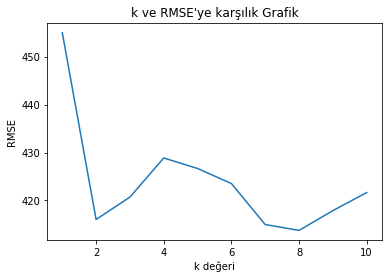

In [63]:
#töntem 1:el yordamıyla k nın bulunması
RMSE=[]
for k in range(1,11):
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    
print("RMSE array:",RMSE)   
plt.plot(range(1,11),RMSE)
plt.title("k ve RMSE'ye karşılık Grafik")
plt.xlabel("k değeri")
plt.ylabel("RMSE");

In [64]:
#yöntem 2:GridSearchCV
knn_params={"n_neighbors":np.arange(1,30,1)}
knn=KNeighborsRegressor()
knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [65]:
#en iyi k değeri
knn_cv_model.best_params_

{'n_neighbors': 8}

In [66]:
#final model
knn_tuned=KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
y_pred=knn_tuned.predict(X_test)

In [67]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 413.7094731463598


<h2>2-Destek Vektör Regresyonu(Suppory Vector Regression)</h2>
Güçlü ve esnek modelleme tekniklerinden birisidir. Sınıflandırma ve regresyon için kullanılabilir.Robust(dayanıklı) bir regresyon modelleme tekniğidir.
<img src="image/svm.JPG">

- Amaç,bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemekir.

<h3>Model & Tahmin</h3>

In [81]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [90]:
svr_model=SVR("linear").fit(X_train,y_train)#linaer yerine "rbf"'de yazabiliriz
svr_model#modelde c parametresini optimize etmeye çalışıyoruz

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
svr_model.intercept_

array([-80.15196151])

In [92]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [93]:
#tahmin
y_pred=svr_model.predict(X_test)

In [94]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 370.04084185624924


<h3>Model Tuning</h3>

In [97]:
svr_model=SVR("linear")
svr_params={"C": [0.1,0.5,1,3]}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)
#svr_cv_model=GridSearchCV(svr_model,svr_params,cv=5,verbose=2,
#n_jobs=-1).fit(X_train,y_train) şeklinde kod 
#çalıştırılırsa yapılan işlem rapor edilir ve işlemci maksimum verimle kullanılır

In [102]:
C=svr_cv_model.best_params_
print("en uygun C değeri:", C)

en uygun C değeri: {'C': 0.5}


In [103]:
svr_model_tuned=SVR("linear",C=0.5).fit(X_train,y_train)

In [105]:
#tahmin
y_pred=svr_model_tuned.predict(X_test)

In [106]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 367.9874739022889


<h2>3-Yapay Sinir Ağları(Artificial Neural Network)</h2>
<img src=image/ysa.jpg">
<img src=image/ysa1.jpg">

<h3>Model & Tahmin</h3>

In [107]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [110]:
#verilerin standardizasyonu
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [111]:
mlp_model=MLPRegressor().fit(X_train_scaled,y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [115]:
#tahmin
y_pred=mlp_model.predict(X_test_scaled)

In [116]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 659.392185443527


<h3>Model Tuning</h3>

In [132]:
mlp_model=MLPRegressor()
mlp_params={"alpha":[0.1,0.01,0.02,0.001,0.001],
           "hidden_layer_sizes":[(10,2),(5,5),(100,100)]}
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=10,verbose=2,
                         n_jobs=-1).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   29.4s finished


In [133]:
mlp_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}

In [134]:
mlp_model_tuned=MLPRegressor(alpha=0.1,
                             hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)

In [135]:
#tahmin
y_pred=mlp_model_tuned.predict(X_test_scaled)

In [136]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 370.4009988278548


<h2>4-CART(Classification and Regression Tree)</h2>

- amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt guruplara ayrılır.

<h3>Model & Tahmin </h3>

In [173]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [174]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [175]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train,y_train)
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

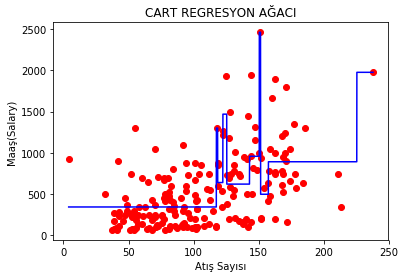

In [176]:
#görselleştirme
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color="blue")

plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayısı")
plt.ylabel("Maaş(Salary)");

In [177]:
#tek değişkenli tahmin
y_pred=cart_model.predict(X_test)

In [178]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 486.34593105235456


In [179]:
#Tüm Değişkenler
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [180]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [181]:
#tahmin
y_pred=cart_model.predict(X_test)

In [182]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 468.89397589115515


<h3>Model Tuning</h3>

In [185]:
cart_model=DecisionTreeRegressor()
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [186]:
?cart_model

In [187]:
cart_params={"max_depth":[2,3,4,5,10,20],
             "min_samples_split":[2,10,5,30,50,100]}
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [190]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [191]:
#final model
cart_tuned=DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)

In [192]:
#tahmin
y_pred=cart_tuned.predict(X_test)

In [193]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 361.0876906511434


<h2>5-Rastgele Ormanlar(Random Forest)</h2>

Topluluk Öğrenme Yöntemleri: Birden fazla algoritmanın ya da birdeb fazla ağacın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır

<strong>Bagging(Bootstrap Aggregation)</strong>:Temeli Bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
<img src="image/rf1.JPG">

<strong>Random Forests</strong>:temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmsine dayanır.

- Baging ile Random Subspace yöntemlerinin birleşimi ile oluşmuştur.
- Ağaçalar için gözlemler bootstrap rastgele örnek seçimi yöntemi ile değişkenler random subspace yöntemi ile seçilir.
- Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
- Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
- Her düğüm noktasında rastgele değişken seçimi yapılır.(regresyonda p/3,sınıflamada karekök p)

<h3>Model & Tahmin</h3>

In [5]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [9]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [10]:
#tahmin
y_pred=rf_model.predict(X_test)

In [11]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 373.04044281427


<h3>Model Tuning</h3>

In [15]:
rf_model=RandomForestRegressor(random_state=42)
rf_params={"max_depth":[5,8,10],
           "max_features":[2,5,10],
           "min_samples_split":[2,10,80,100],
           "n_estimators":[200,500,1000,2000]}
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 14.5min finished
D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [24]:
rf_tuned=RandomForestRegressor(random_state=42,max_depth=8,
                               min_samples_split=2,
                               max_features=2,n_estimators=200).fit(X_train,y_train)

In [26]:
#tahmin
y_pred=rf_tuned.predict(X_test)

In [27]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 348.2372919119422


<h4>Değiken Önem Düzeyi</h4>

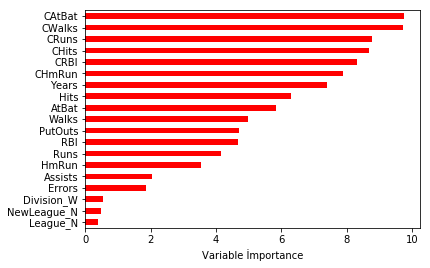

In [32]:
importance=pd.DataFrame({"importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

importance.sort_values(by="importance",axis=0,ascending=True).plot(kind="barh",color="r")
plt.xlabel("Variable İmportance")
plt.gca().legend_=None

<h2>6-Gradient Boosting Machines(GBM)</h2>

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
- Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kullanılır.
- Amaç, hata kareler ortalamasını minimum yapacak şekilde katsayılar ya da karar kuralları bulmaktır.

<strong>Boosting Yöntemlerine Giriş</strong>:
zayıf öğrencileri bir araya getirip güçlü bir öğrenci ortaya çıkarmak fikrine dayanır.

<strong>Kötü Tahmin</strong>:Gerçek değerler ile tahmin edilen değerlerin farkının karelerinin alınması sonucunda ortya çıkan büyük değerlerdir. Kötü tahminde bulunan ağaçlar da zayıf tahmincilerdir.

<strong>AdaBoost(Adaptive Boosting)</strong>:Zayıf sınıflandırcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrine hayata geçiren algoritmadır.

<img src="image/adaboost.JPG">

- Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
- Seri içerisinde bir model serideki bir önceki modelin tahmnin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur.
- GBM difeansiyellenebilen herhangi bir kayıp fnksiyonunu optimize edebilen Gradient descent algoritmasını kullanmakta.
- GBM bir çok temel öğrenici tipi(base learner type) kullanabilir.(Trees,linear terms,splines,..)
- Cost Fonksiyonları ve link fonksiyonları modifiye edilebilir.
- Boosting + Gradient Descent

<h3>Model & Tahmin </h3>

In [33]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [35]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
?gbm_model

In [36]:
#tahmin
y_pred=gbm_model.predict(X_test)

In [37]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 348.0899416307912


<h3>Model Tuning</h3>

In [41]:
gbm_model=GradientBoostingRegressor()
gbm_params={"n_estimators":[100,200,500],
            "learning_rate":[0.001,0.1,0.01],
            "max_depth":[3,5,8],
            "subsample":[1,0.5,0.8],
            "loss":['ls', 'lad', 'quantile']}
gbm_cv_models=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 471 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1907 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  3.8min finished


In [42]:
gbm_cv_models.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 1}

In [46]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,
                                    subsample=1,loss="lad",n_estimators=500).fit(X_train,y_train)

In [49]:
#tahmin
y_pred=gbm_tuned.predict(X_test)

In [50]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 339.1634790884989


<h2>7-XGBoost(eXtreme Gradient Boosting)</h2>

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklemnebilir ve farklı platformlara entegre edilebilir halidir.
- Ölçeklenebilirdir
- Hızlıdır
- Tahmin Başarısı yüksektir
- bir çok kaggle yarışmasında başarısını kanıtlamıştır.

<h3>Model & Tahmin</h3>

In [54]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [57]:
#!pip install xgboost
from xgboost import XGBRegressor

In [58]:
xgb_model=XGBRegressor().fit(X_train,y_train)
xgb_model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [59]:
#tahmin
y_pred=xgb_model.predict(X_test)

In [60]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 355.4651481224188


<h3>Model Tuned</h3>

In [61]:
xgb_model=XGBRegressor()
xgb_params={"learning_rate":[0.1,0.01,0.5],
            "max_depth":[2,3,4,5,8],
            "n_estimators":[100,200,500,100],
            "colsample_bytree":[0.4,0.7,1]}
xgb_cv_model=GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


In [62]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [63]:
xgb_tuned=XGBRegressor(learning_rate=0.1,max_depth=2,
                       n_estimators=500,colsample_bytree=0.4).fit(X_train,y_train)

In [64]:
#tahmin
y_pred=xgb_tuned.predict(X_test)

In [65]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 364.02230428244354


<h2>8-Light GBM</h2>

Light GBM,XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

- Daha Performanslı
- Lewel-wise büyüme stratejisis yerine Leaf-wise büyüme stratejisi
- Breadth-first search(BFS yerine depth-first search(DFS)

<h3>Model & Tahmin</h3>

In [66]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [67]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

In [68]:
lgbm_model=LGBMRegressor().fit(X_train,y_train)
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [69]:
#tahmin
y_pred=lgbm_model.predict(X_test)

In [70]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 363.8712087611089


<h3>Model Tuning</h3>

In [71]:
lgbm_model=LGBMRegressor()
lgbm_params={"learning_rate":[0.1,0.01,0.5,1],
             "max_depth":[1,2,3,4,5,6,7,8,9],
             "n_estimators":[20,40,100,1000],
             "colsample_bytree":[0.4,0.7,1]}
lgbm_cv_model=GridSearchCV(lgbm_model,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1044 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 3074 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.7min finished


In [72]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 40}

In [74]:
lgbm_tuned=LGBMRegressor(learning_rate=0.1,max_depth=5,n_estimators=40,
                         colsample_bytree=0.4).fit(X_train,y_train)

In [75]:
#tahmin
y_pred=lgbm_tuned.predict(X_test)

In [76]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 377.8415676535648


<h2>9-CatBoost(Cateegory Boosting)</h2>

kategorik değişkenler ile otomatik olarak mücadele edebilen hızlı, başarılı bir diğer GBM türevi. 

- Kategorik değişken desteği
- Hızlı ve ölçeklenebilir GPU desteği
- daha başarılı tahminler
- Hızlı train ve hızlı tahmin
- Rusyanın ilk açık kaynak kodlu, başarılı ML çalışması.

<h3>Model & Tahmin</h3>

In [78]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
#kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)
print("df shape:",df.shape)
df.head()

df shape: (263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [79]:
#!pip install catboost
from catboost import CatBoostRegressor

In [80]:
cb_model=CatBoostRegressor().fit(X_train,y_train)
cb_model

Learning rate set to 0.029229
0:	learn: 438.1942308	total: 54.7ms	remaining: 54.7s
1:	learn: 432.4080489	total: 56.6ms	remaining: 28.2s
2:	learn: 426.4284454	total: 58.9ms	remaining: 19.6s
3:	learn: 420.2654774	total: 60.9ms	remaining: 15.2s
4:	learn: 414.0515276	total: 63.3ms	remaining: 12.6s
5:	learn: 409.2442808	total: 65.2ms	remaining: 10.8s
6:	learn: 403.3717310	total: 67ms	remaining: 9.5s
7:	learn: 397.8646959	total: 68.6ms	remaining: 8.51s
8:	learn: 392.2419888	total: 70.2ms	remaining: 7.73s
9:	learn: 387.2019582	total: 71.8ms	remaining: 7.11s
10:	learn: 381.9852190	total: 73.7ms	remaining: 6.62s
11:	learn: 377.3994777	total: 75.9ms	remaining: 6.25s
12:	learn: 372.5056201	total: 78.5ms	remaining: 5.96s
13:	learn: 368.4425005	total: 80.2ms	remaining: 5.65s
14:	learn: 364.0366203	total: 81.7ms	remaining: 5.36s
15:	learn: 359.7061133	total: 83.7ms	remaining: 5.15s
16:	learn: 355.3448847	total: 85.2ms	remaining: 4.93s
17:	learn: 350.4851173	total: 86.8ms	remaining: 4.73s
18:	learn: 

209:	learn: 129.0533884	total: 462ms	remaining: 1.74s
210:	learn: 128.7143737	total: 465ms	remaining: 1.74s
211:	learn: 128.5500857	total: 467ms	remaining: 1.74s
212:	learn: 128.2733096	total: 470ms	remaining: 1.74s
213:	learn: 127.9559819	total: 473ms	remaining: 1.74s
214:	learn: 127.7264048	total: 475ms	remaining: 1.73s
215:	learn: 127.5996897	total: 479ms	remaining: 1.74s
216:	learn: 127.3057580	total: 482ms	remaining: 1.74s
217:	learn: 126.5641450	total: 484ms	remaining: 1.74s
218:	learn: 125.9921861	total: 486ms	remaining: 1.73s
219:	learn: 125.6127626	total: 487ms	remaining: 1.73s
220:	learn: 125.4263769	total: 489ms	remaining: 1.72s
221:	learn: 124.9721719	total: 492ms	remaining: 1.72s
222:	learn: 124.8147678	total: 493ms	remaining: 1.72s
223:	learn: 124.5249507	total: 495ms	remaining: 1.71s
224:	learn: 124.2605128	total: 496ms	remaining: 1.71s
225:	learn: 123.9103045	total: 497ms	remaining: 1.7s
226:	learn: 123.4621463	total: 505ms	remaining: 1.72s
227:	learn: 123.0366486	total

382:	learn: 73.9700290	total: 770ms	remaining: 1.24s
383:	learn: 73.6314278	total: 772ms	remaining: 1.24s
384:	learn: 73.3291771	total: 773ms	remaining: 1.24s
385:	learn: 72.9524617	total: 775ms	remaining: 1.23s
386:	learn: 72.5672790	total: 776ms	remaining: 1.23s
387:	learn: 72.2522037	total: 778ms	remaining: 1.23s
388:	learn: 72.0012292	total: 779ms	remaining: 1.22s
389:	learn: 71.7497011	total: 781ms	remaining: 1.22s
390:	learn: 71.6630904	total: 783ms	remaining: 1.22s
391:	learn: 71.2610327	total: 785ms	remaining: 1.22s
392:	learn: 70.9938329	total: 788ms	remaining: 1.22s
393:	learn: 70.6786024	total: 790ms	remaining: 1.21s
394:	learn: 70.5749681	total: 792ms	remaining: 1.21s
395:	learn: 70.5149770	total: 794ms	remaining: 1.21s
396:	learn: 70.2154877	total: 798ms	remaining: 1.21s
397:	learn: 69.9626015	total: 800ms	remaining: 1.21s
398:	learn: 69.6899507	total: 802ms	remaining: 1.21s
399:	learn: 69.1838532	total: 804ms	remaining: 1.21s
400:	learn: 68.9930198	total: 806ms	remaining:

604:	learn: 37.4149434	total: 1.22s	remaining: 799ms
605:	learn: 37.3484889	total: 1.23s	remaining: 797ms
606:	learn: 37.2179409	total: 1.23s	remaining: 795ms
607:	learn: 37.0690289	total: 1.23s	remaining: 793ms
608:	learn: 36.9396275	total: 1.23s	remaining: 791ms
609:	learn: 36.7431384	total: 1.24s	remaining: 790ms
610:	learn: 36.5580140	total: 1.24s	remaining: 788ms
611:	learn: 36.4754614	total: 1.24s	remaining: 786ms
612:	learn: 36.3065094	total: 1.24s	remaining: 784ms
613:	learn: 36.2253461	total: 1.25s	remaining: 783ms
614:	learn: 36.1101090	total: 1.25s	remaining: 782ms
615:	learn: 36.0192640	total: 1.25s	remaining: 780ms
616:	learn: 35.9084903	total: 1.25s	remaining: 778ms
617:	learn: 35.8170389	total: 1.25s	remaining: 776ms
618:	learn: 35.7498493	total: 1.26s	remaining: 775ms
619:	learn: 35.5878768	total: 1.26s	remaining: 775ms
620:	learn: 35.5322541	total: 1.27s	remaining: 775ms
621:	learn: 35.3134543	total: 1.27s	remaining: 773ms
622:	learn: 35.1854892	total: 1.28s	remaining:

830:	learn: 19.6675529	total: 1.68s	remaining: 342ms
831:	learn: 19.6367651	total: 1.69s	remaining: 340ms
832:	learn: 19.5735680	total: 1.69s	remaining: 338ms
833:	learn: 19.5630985	total: 1.69s	remaining: 336ms
834:	learn: 19.5147575	total: 1.69s	remaining: 334ms
835:	learn: 19.4661740	total: 1.69s	remaining: 332ms
836:	learn: 19.4083571	total: 1.7s	remaining: 330ms
837:	learn: 19.3700491	total: 1.7s	remaining: 328ms
838:	learn: 19.2819868	total: 1.7s	remaining: 326ms
839:	learn: 19.2684684	total: 1.7s	remaining: 324ms
840:	learn: 19.2494487	total: 1.7s	remaining: 322ms
841:	learn: 19.1860879	total: 1.71s	remaining: 320ms
842:	learn: 19.1541078	total: 1.71s	remaining: 318ms
843:	learn: 19.0799617	total: 1.71s	remaining: 316ms
844:	learn: 19.0403715	total: 1.71s	remaining: 314ms
845:	learn: 18.9814671	total: 1.71s	remaining: 311ms
846:	learn: 18.9055783	total: 1.71s	remaining: 309ms
847:	learn: 18.8927984	total: 1.72s	remaining: 308ms
848:	learn: 18.8393782	total: 1.72s	remaining: 306m

987:	learn: 12.8919796	total: 1.98s	remaining: 24.1ms
988:	learn: 12.8688224	total: 1.99s	remaining: 22.1ms
989:	learn: 12.8387959	total: 1.99s	remaining: 20.1ms
990:	learn: 12.8252272	total: 1.99s	remaining: 18.1ms
991:	learn: 12.8137387	total: 1.99s	remaining: 16.1ms
992:	learn: 12.7760157	total: 1.99s	remaining: 14ms
993:	learn: 12.7401342	total: 1.99s	remaining: 12ms
994:	learn: 12.7140879	total: 2s	remaining: 10ms
995:	learn: 12.6844512	total: 2s	remaining: 8.03ms
996:	learn: 12.6790868	total: 2s	remaining: 6.02ms
997:	learn: 12.6471594	total: 2s	remaining: 4.01ms
998:	learn: 12.6137983	total: 2s	remaining: 2.01ms
999:	learn: 12.5732447	total: 2.01s	remaining: 0us


In [82]:
#tahmin
y_pred=cb_model.predict(X_test)

In [83]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 354.1424860950047


<h3> Model Tuning</h3>

In [84]:
cb_model=CatBoostRegressor()
cb_params={"iterations":[200,500,100],
           "learning_rate":[0.01,0.1],
           "depth":[3,6,8]}
cb_cv_model=GridSearchCV(cb_model,cb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


0:	learn: 427.1241905	total: 3.32ms	remaining: 661ms
1:	learn: 406.8148140	total: 5.03ms	remaining: 498ms
2:	learn: 389.8231648	total: 7.1ms	remaining: 466ms
3:	learn: 374.3907690	total: 8.61ms	remaining: 422ms
4:	learn: 360.3338267	total: 9.42ms	remaining: 367ms
5:	learn: 347.2936452	total: 10ms	remaining: 324ms
6:	learn: 336.6561889	total: 10.6ms	remaining: 293ms
7:	learn: 324.7194248	total: 11.2ms	remaining: 268ms
8:	learn: 314.8525666	total: 11.8ms	remaining: 250ms
9:	learn: 308.6748928	total: 12.4ms	remaining: 235ms
10:	learn: 299.9037104	total: 13.2ms	remaining: 227ms
11:	learn: 295.7403622	total: 14.9ms	remaining: 234ms
12:	learn: 289.5912467	total: 15.5ms	remaining: 223ms
13:	learn: 283.0225629	total: 16.1ms	remaining: 214ms
14:	learn: 277.0512990	total: 17.3ms	remaining: 214ms
15:	learn: 271.1877335	total: 18.1ms	remaining: 208ms
16:	learn: 267.5630863	total: 18.9ms	remaining: 204ms
17:	learn: 263.0506688	total: 19.9ms	remaining: 202ms
18:	learn: 258.4265758	total: 20.7ms	rema

In [85]:
cb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [86]:
cb_tuned=CatBoostRegressor(iterations=200,learning_rate=0.1,depth=3).fit(X_train,y_train)

0:	learn: 427.1241905	total: 652us	remaining: 130ms
1:	learn: 406.8148140	total: 2.8ms	remaining: 277ms
2:	learn: 389.8231648	total: 5.16ms	remaining: 339ms
3:	learn: 374.3907690	total: 6.09ms	remaining: 299ms
4:	learn: 360.3338267	total: 7.33ms	remaining: 286ms
5:	learn: 347.2936452	total: 7.92ms	remaining: 256ms
6:	learn: 336.6561889	total: 8.47ms	remaining: 234ms
7:	learn: 324.7194248	total: 9.02ms	remaining: 216ms
8:	learn: 314.8525666	total: 9.58ms	remaining: 203ms
9:	learn: 308.6748928	total: 10.1ms	remaining: 193ms
10:	learn: 299.9037104	total: 10.7ms	remaining: 183ms
11:	learn: 295.7403622	total: 11.2ms	remaining: 175ms
12:	learn: 289.5912467	total: 11.7ms	remaining: 169ms
13:	learn: 283.0225629	total: 12.3ms	remaining: 163ms
14:	learn: 277.0512990	total: 12.8ms	remaining: 158ms
15:	learn: 271.1877335	total: 13.4ms	remaining: 154ms
16:	learn: 267.5630863	total: 16.3ms	remaining: 176ms
17:	learn: 263.0506688	total: 17.1ms	remaining: 173ms
18:	learn: 258.4265758	total: 17.8ms	rem

In [87]:
#tahmin
y_pred=cb_tuned.predict(X_test)

In [88]:
#hata
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",RMSE)

RMSE: 336.82944918834545


<h1>Makina Öğrenmesi Görevlerinin Otomatikleştirilmesi</h1>

In [92]:
#dataset beyzbol ile ilgili biz maaş değişkenine odaklanıyoruz
df=pd.read_csv("data/Hitters.csv")
df=df.dropna()
#aşağıdaki satırda kategorik değişkenler dummiye çevrildi one-hot encoding
dms=pd.get_dummies(df[["League","Division","NewLeague"]])

In [123]:
def compML(df,y,alg):
    #train test split
    y=df[y]
    #kategorik değikenleri ve bağımlı değişkeni bağımsız değişkelrin içinden çıkartıyoruz
    X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
    X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                                   random_state=42)
    
    #modelleme
    model=alg().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    model_name=alg.__name__
    return {"RMSE test for model {}".format(model_name):RMSE}


In [124]:
compML(df,"Salary",LGBMRegressor)

{'RMSE test for model LGBMRegressor': 363.8712087611089}

In [125]:
compML(df,"Salary",SVR)

{'RMSE test for model SVR': 473.4445984431814}

In [126]:
models=[LGBMRegressor,XGBRegressor,GradientBoostingRegressor,
        RandomForestRegressor,DecisionTreeRegressor,MLPRegressor,
        KNeighborsRegressor,SVR]

In [127]:
for alg in models:
    print(compML(df,"Salary",alg))

{'RMSE test for model LGBMRegressor': 363.8712087611089}
{'RMSE test for model XGBRegressor': 355.4651481224188}
{'RMSE test for model GradientBoostingRegressor': 351.7158798612983}
{'RMSE test for model RandomForestRegressor': 341.7421928278616}
{'RMSE test for model DecisionTreeRegressor': 469.8626351734477}
{'RMSE test for model MLPRegressor': 439.58009226253466}
{'RMSE test for model KNeighborsRegressor': 426.6570764525201}
{'RMSE test for model SVR': 473.4445984431814}
